In [25]:
import os
os.chdir(r'C:\Users\divyam.arora\Desktop\libraries\statsmodels-master')

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#Importing data`
df = pd.read_csv(r'E:\Time-Series-Problem\TS\bookings.csv')

In [30]:
df

,Year,Month,Bookings
0,2006,Jan,383
1,2006,Feb,366
2,2006,Mar,250
3,2006,Apr,318
4,2006,May,334
5,2006,Jun,397
6,2006,Jul,575
7,2006,Aug,701
8,2006,Sep,506
9,2006,Oct,335


In [31]:
total=len(df)

In [32]:
#creating train and test(last 6 months bookings)
train=df[:(total-6)]
test=df[(total-6):]

In [33]:
train['Year']=train['Year'].astype(str)
train['date'] = train[['Year', 'Month']].apply(lambda x: pd.to_datetime('/'.join(x)), axis=1)
train.index=train['date']
test['Year']=test['Year'].astype(str)
test['date'] = test[['Year', 'Month']].apply(lambda x: pd.to_datetime('/'.join(x)), axis=1)
test.index=test['date']

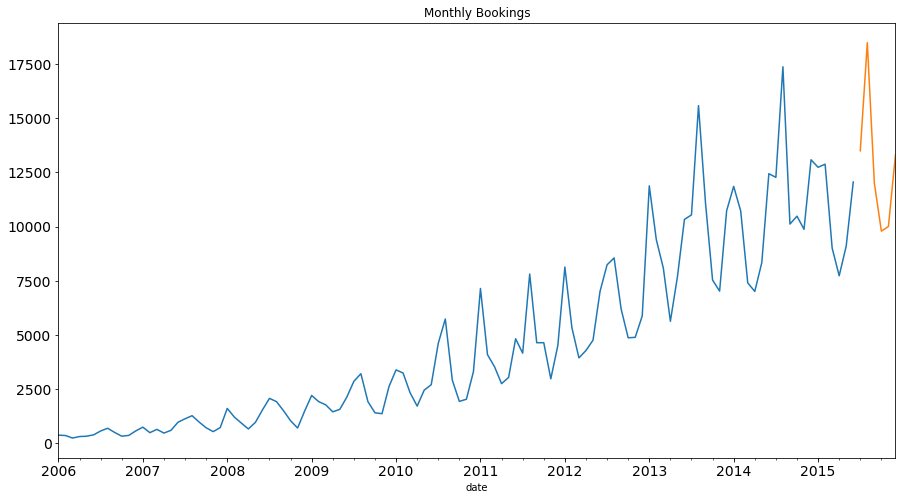

In [34]:
#Plotting data
train.Bookings.plot(figsize=(15,8), title= 'Monthly Bookings', fontsize=14)
test.Bookings.plot(figsize=(15,8), title= 'Monthly Bookings', fontsize=14)
plt.show()

In [35]:
train.head(5)

,Year,Month,Bookings,date
date,,,,
2006-01-01,2006,Jan,383,2006-01-01
2006-02-01,2006,Feb,366,2006-02-01
2006-03-01,2006,Mar,250,2006-03-01
2006-04-01,2006,Apr,318,2006-04-01
2006-05-01,2006,May,334,2006-05-01


## Naive Method

- Such forecasting technique which assumes that the next expected point is equal to the last observed point is called Naive Method.
- y(t+1)= y(t)

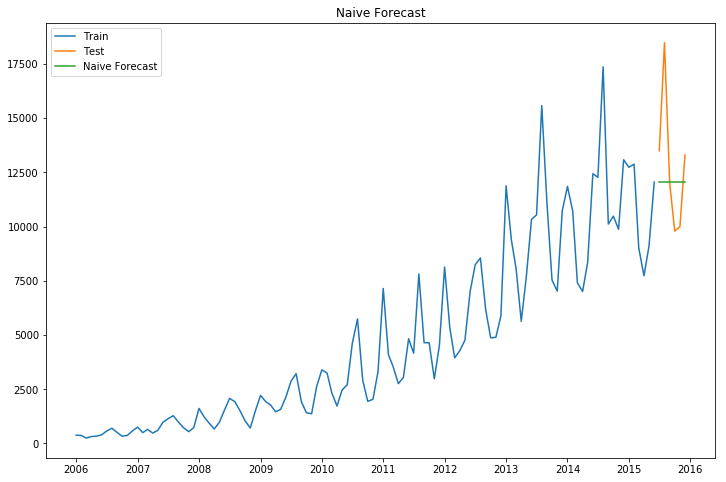

In [37]:
dd= np.asarray(train.Bookings)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Bookings'], label='Train')
plt.plot(test.index,test['Bookings'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Bookings, y_hat.naive))
print(rms)

3006.644641456652


- CONCLUSION: Naive method isn’t suited for datasets with high variability. It is best suited for stable datasets.

## Simple average technique

- Such forecasting technique which forecasts the expected value equal to the average of all previously observed points is called Simple Average technique.
- y(x+1)= (1/x)*for i =1 to x add(Yi)  i.e mean

- calculate the average and take it as the next value. Of course it won’t be it exact, but somewhat close. As a forecasting method, there are actually situations where this technique works the best.

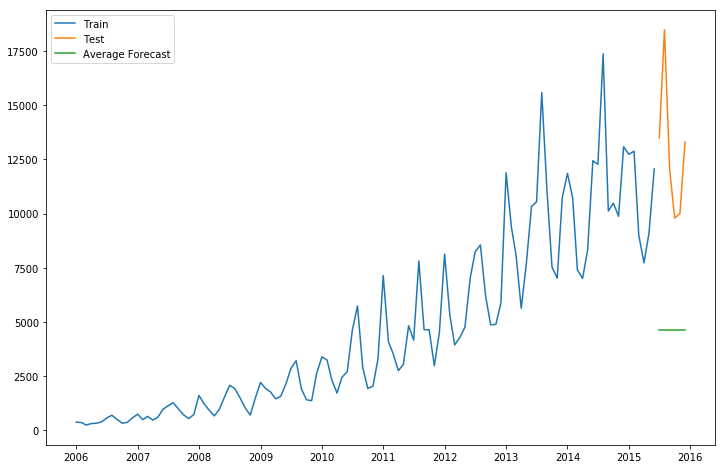

In [39]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Bookings'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Bookings'], label='Train')
plt.plot(test['Bookings'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [40]:
rms = sqrt(mean_squared_error(test.Bookings, y_hat_avg.avg_forecast))
print(rms)

8716.765715730593


- CONCLUSION: this method works best when the average at each time period remains constant

## Moving Average

- Such forecasting technique which uses window of time period for calculating the average is called Moving Average technique. 

- Using a simple moving average model, we forecast the next value(s) in a time series based on the average of a fixed finite number ‘p’ of the previous values. Thus, for all i > p

- y cap = 1/p(y[i-1]+y[i-2]+y[i-3]+y[i-3]+y[i-4]+y[i-5]+......+y[i=p])

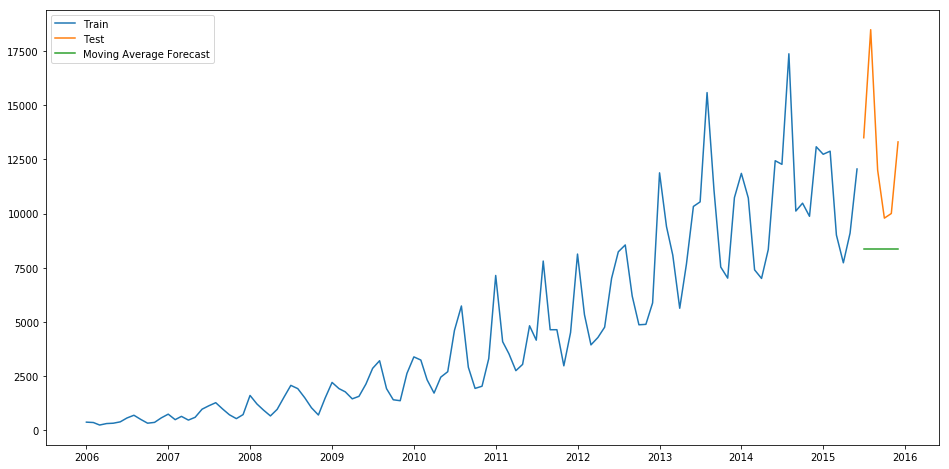

In [42]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Bookings'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Bookings'], label='Train')
plt.plot(test['Bookings'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [43]:
rms = sqrt(mean_squared_error(test.Bookings, y_hat_avg.moving_avg_forecast))
print(rms)

5330.810201873633


## Weighted moving average
- A weighted moving average is a moving average where within the sliding window values are given different weights, typically so that more recent points matter more
- y cap = 1/m*(w1*y[i-1]+w2*y[i-2]+.......+wm*y[i-m])

## Simple Exponential Smoothing

In [44]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

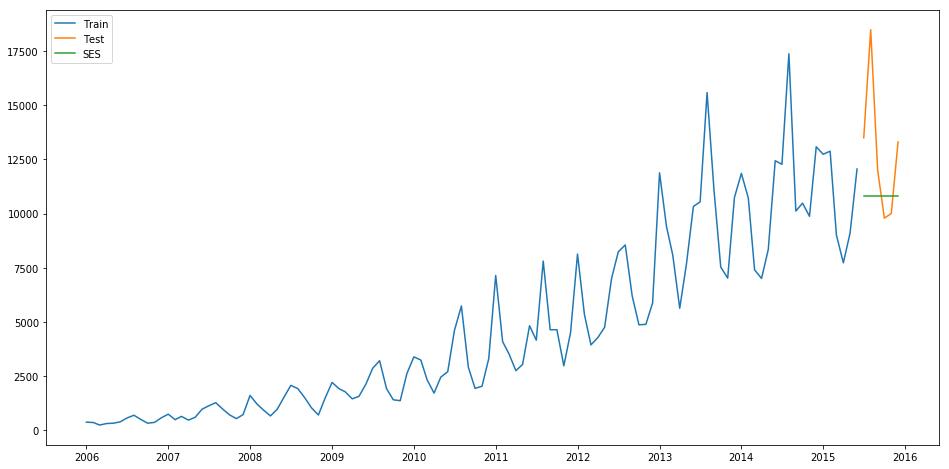

In [47]:
#from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Bookings'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Bookings'], label='Train')
plt.plot(test['Bookings'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [48]:
rms = sqrt(mean_squared_error(test.Bookings, y_hat_avg.SES))
print(rms)

3531.9305435653923


## Holt's Linear Trend Method

- method that can map the trend accurately without any assumptions. Such a method that takes into account the trend of the dataset is called Holt’s Linear Trend method

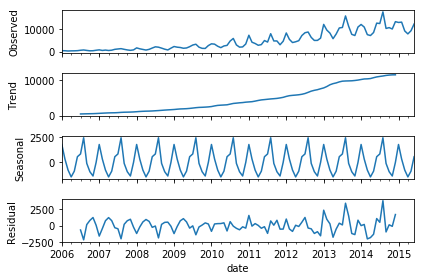

In [19]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Bookings).plot()
result = sm.tsa.stattools.adfuller(train.Bookings)
plt.show()

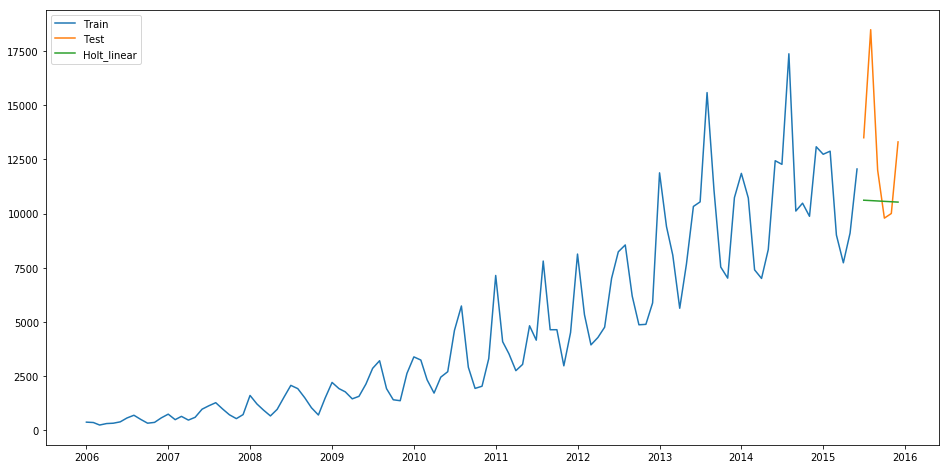

In [20]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Bookings'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Bookings'], label='Train')
plt.plot(test['Bookings'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [21]:
rms = sqrt(mean_squared_error(test.Bookings, y_hat_avg.Holt_linear))
print(rms)

3674.4552701297916


## Holt Winter Mehtod

- a method that takes into account both trend and seasonality to forecast future prices. One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind triple exponential smoothing(Holt’s Winter) is to apply exponential smoothing to the seasonal components in addition to level and trend.

<Figure size 1152x576 with 0 Axes>

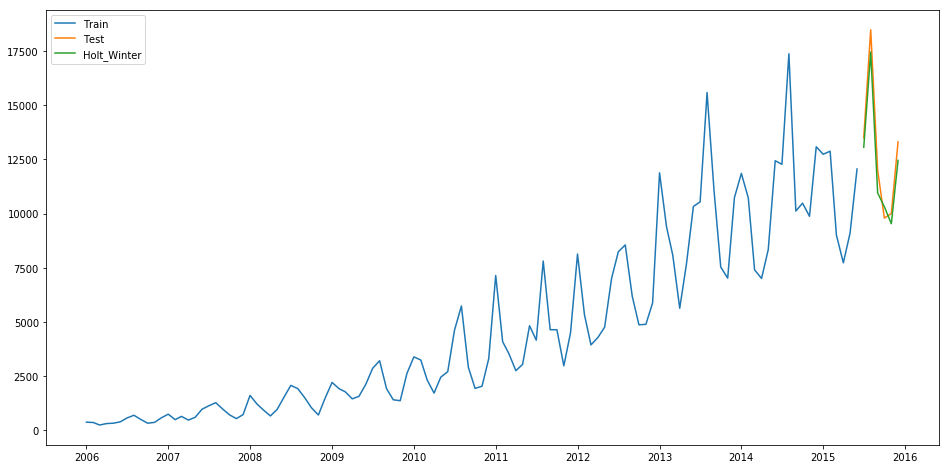

In [23]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Bookings']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Bookings'], label='Train')
plt.plot(test['Bookings'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [24]:
rms = sqrt(mean_squared_error(test.Bookings, y_hat_avg.Holt_Winter))
print(rms)

772.1803363403035


## ETS Modelling for Time Series

In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#Importing data`
df = pd.read_csv(r'E:\Time-Series-Problem\TS\bookings.csv')

In [50]:
total=len(df)

In [51]:
#creating train and test(last 6 months bookings)
train=df[:(total-6)]
test=df[(total-6):]

In [52]:
# check the decompostion plot

In [53]:
train['Year']=train['Year'].astype(str)

In [54]:
train['date'] = train[['Year', 'Month']].apply(lambda x: pd.to_datetime('/'.join(x)), axis=1)

In [55]:
train.index=train['date']

In [56]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [62]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Bookings, model='additive').plot()
result = sm.tsa.stattools.adfuller(train.Bookings)

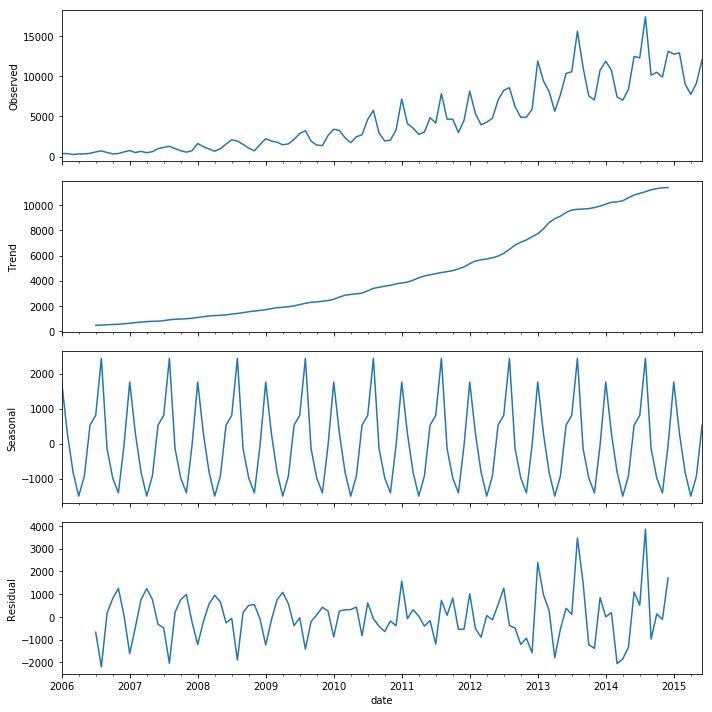

In [63]:
plt.show()

In [59]:
#error looks like changing variance in between - multiplicative
#trend - seems linear
#seasonality - constant

In [60]:
# check exponential smoothing

In [64]:
test['Year']=test['Year'].astype(str)
test['date'] = test[['Year', 'Month']].apply(lambda x: pd.to_datetime('/'.join(x)), axis=1)
test.index=test['date']

In [65]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

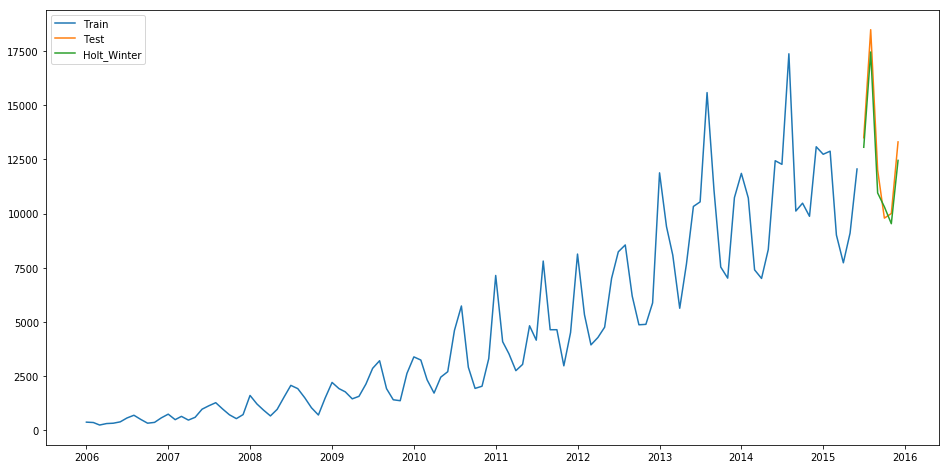

In [66]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Bookings']) ,seasonal_periods=12 ,trend='add', seasonal='add',damped=True).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Bookings'], label='Train')
plt.plot(test['Bookings'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [67]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms =sqrt(mean_squared_error(test.Bookings, y_hat_avg.Holt_Winter))
print(rms)

#RMSE = 23.9614925662

772.1751722988835


In [68]:
y_hat_avg

,Year,Month,Bookings,date,Holt_Winter
date,,,,,
2015-07-01,2015,Jul,13496,2015-07-01,13056.377302
2015-08-01,2015,Aug,18478,2015-08-01,17450.165245
2015-09-01,2015,Sep,12004,2015-09-01,10951.716307
2015-10-01,2015,Oct,9789,2015-10-01,10312.099675
2015-11-01,2015,Nov,10003,2015-11-01,9532.705385
2015-12-01,2015,Dec,13304,2015-12-01,12452.117782


In [69]:
# can use error component in alteryx(like KNIME)

## ARIMA models

In [70]:
#check decompostion plot if seasonality exits then use seasonal differencing else use non-seasonal differncing

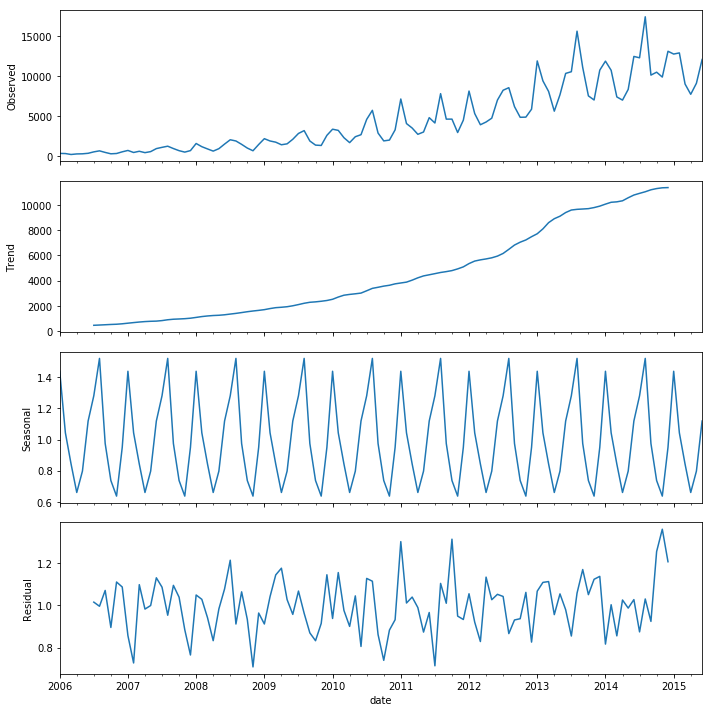

In [79]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Bookings, model='multiplicative').plot()
result = sm.tsa.stattools.adfuller(train.Bookings)
plt.show()

In [80]:
#ploting rolling statistics to check stationarity

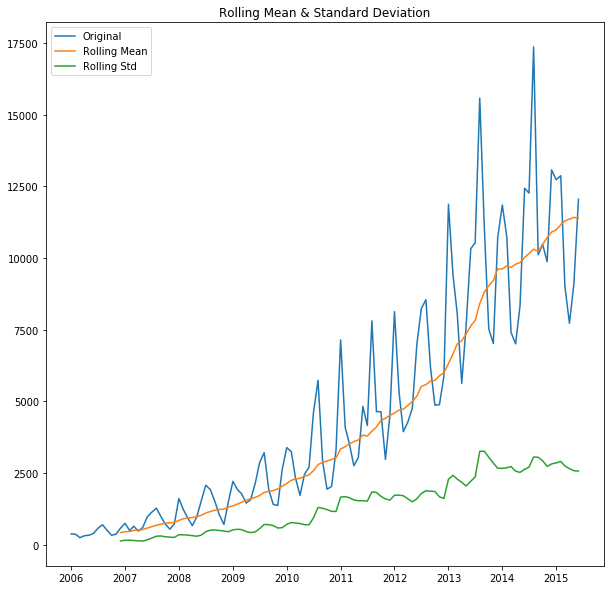

In [81]:
#Determing rolling statistics
Main_ts=train.Bookings
rolmean = Main_ts.rolling(window=12).mean()
rolstd = Main_ts.rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(Main_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## Step 1.2: Seasonality – Time Series Decomposition

In [82]:
monthly_sales_data = pd.pivot_table(train, values = "Bookings", columns = "Year", index = "Month")
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Month,,,,,,,,,,
Jan,383.0,751.0,1615.0,2214.0,3392.0,7146.0,8133.0,11878.0,11853.0,12734.0
Feb,366.0,498.0,1219.0,1928.0,3246.0,4093.0,5337.0,9398.0,10716.0,12876.0
Mar,250.0,649.0,940.0,1780.0,2334.0,3537.0,3946.0,8083.0,7405.0,9012.0
Apr,318.0,478.0,670.0,1458.0,1723.0,2757.0,4286.0,5634.0,7009.0,7730.0
May,334.0,606.0,972.0,1573.0,2458.0,3045.0,4761.0,7675.0,8340.0,9102.0
Jun,397.0,980.0,1543.0,2138.0,2709.0,4827.0,7012.0,10328.0,12437.0,12055.0
Jul,575.0,1137.0,2079.0,2864.0,4615.0,4163.0,8237.0,10539.0,12269.0,NaN
Aug,701.0,1280.0,1928.0,3216.0,5739.0,7811.0,8553.0,15578.0,17367.0,NaN
Sep,506.0,987.0,1509.0,1927.0,2913.0,4644.0,6198.0,11067.0,10116.0,NaN


In [83]:
monthly_sales_data.plot()

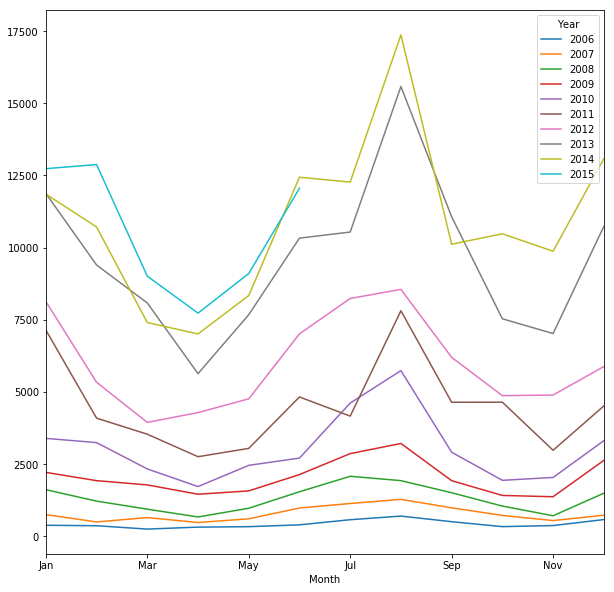

In [84]:
plt.show()

## check dickey-Fuller test if we want:
- This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [85]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(Main_ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   2.672903
p-value                          0.999085
#lags Used                      11.000000
Number of Observations Used    102.000000
Critical Value (1%)             -3.496149
Critical Value (5%)             -2.890321
Critical Value (10%)            -2.582122
dtype: float64


Though the variation in standard deviation is small, rolling mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values.

As we observed while plotting the moving average over months that there is a monhly pattern, now, let’s decipher the seasonal component.

# Start making this stationary

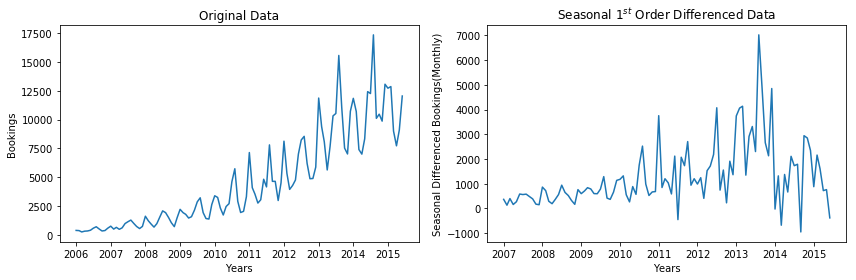

In [86]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
axes[0].plot(train.index, train['Bookings'])
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Bookings")
axes[0].set_title("Original Data")
axes[1].plot(train.index, train['Bookings'].diff(periods=12))
axes[1].set_xlabel("Years")
axes[1].set_ylabel("Seasonal Differenced Bookings(Monthly)")
axes[1].set_title("Seasonal 1$^{st}$ Order Differenced Data")
plt.tight_layout()
plt.show()

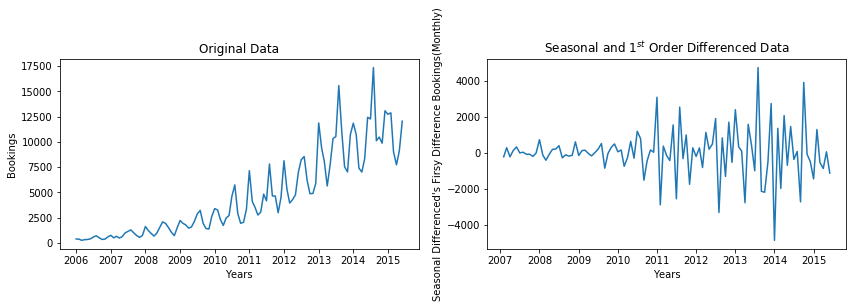

In [87]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
axes[0].plot(train.index, train['Bookings'])
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Bookings")
axes[0].set_title("Original Data")
axes[1].plot(train.index, train['Bookings'].diff(periods=12).diff(periods=1))
axes[1].set_xlabel("Years")
axes[1].set_ylabel("Seasonal Differenced's Firsy Difference Bookings(Monthly)")
axes[1].set_title("Seasonal and 1$^{st}$ Order Differenced Data")
plt.tight_layout()
plt.show()

In [88]:
#check for rolling staistics and dickey fuller test

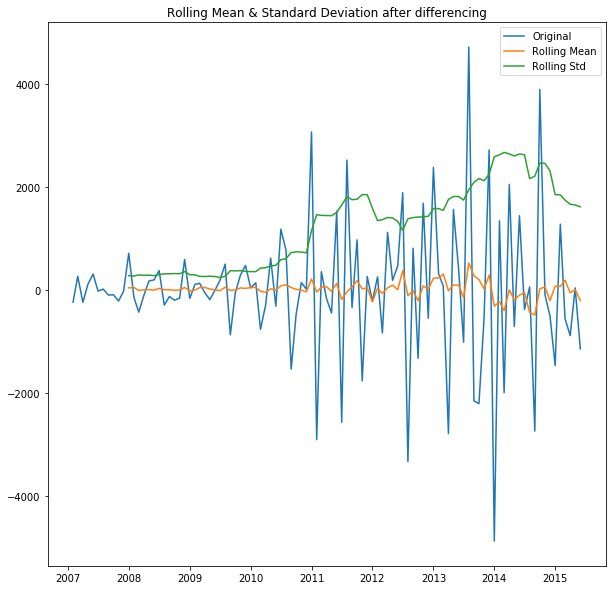

In [89]:
#Determing rolling statistics
differenced_ts=train.Bookings.diff(periods=12).diff(periods=1)
rolmean = differenced_ts.rolling(window=12).mean()
rolstd = differenced_ts.rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(differenced_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation after differencing')
plt.show(block=False)

In [90]:
# to deal with variance we can take log transformation first and then differencing

In [91]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(train['Bookings']).diff(periods=12).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Bookings)')

Text(0,0.5,'Differenced Log (Bookings)')

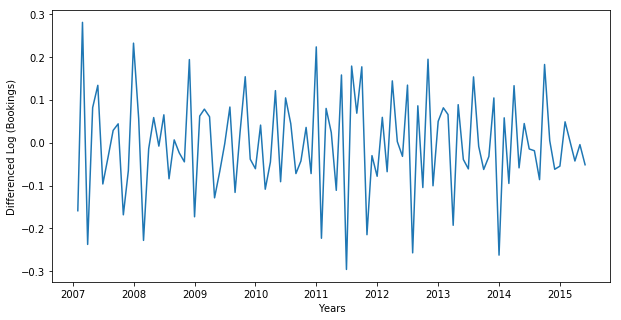

In [92]:
plt.show()

In [93]:
#check rolling statistics again

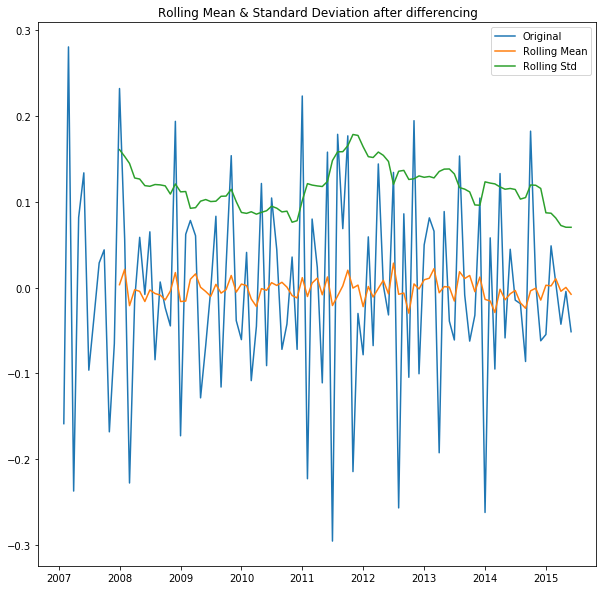

In [94]:
#Determing rolling statistics
differenced_ts=np.log10(train.Bookings).diff(periods=12).diff(periods=1)
rolmean = differenced_ts.rolling(window=12).mean()
rolstd = differenced_ts.rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(differenced_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation after differencing')
plt.show(block=False)

## Step 5: Plot ACF and PACF to identify potential AR and MA model

In [95]:
#ts_book_log = np.log10(train.Bookings)
#ts_book_log.dropna(inplace=True)

ts_book_log_diff = train.Bookings.diff(periods=12).diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
ts_book_log_diff.dropna(inplace=True)

In [96]:
import statsmodels.tsa.api as smt
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(ts_book_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(ts_book_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

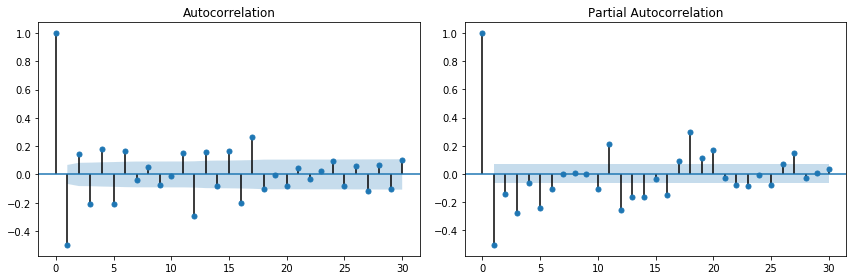

In [97]:
plt.show()

In [98]:
#till now seasonal diff 1 time and normal diff 1 time so
#d=1 and D=1

In [99]:
# at lag-0 correlation will be 1 since the value is itself
# at lag-1 negative correlation so q=1
# at lag-12 negative correlation so Q=1

In [100]:
#so ARIMA will be p=0,d=1,q=1,P=0,D=1,Q=1,m=12
#ARIMA(0,1,1)(0,1,1)12

In [101]:
# comparing our model with the best model reported in the blog
blog_param_order=(0,1,1)
blog_param_seasonal_order=(0,1,1,12)
ts_model = sm.tsa.statespace.SARIMAX(train.Bookings,
                                      order=(0,1,1),
                                      seasonal_order=(0,1,1,12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
ts_results = ts_model.fit()
print("Blog SARIMAX{}x{}12 model - AIC:{}".format(blog_param_order, blog_param_seasonal_order, ts_results.aic))

Blog SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:1703.7584153776734


## Step 7: Predict sales on in-sample date using the best fit ARIMA model¶

In [102]:
print(ts_results.summary().tables[0])
print(ts_results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                           Bookings   No. Observations:                  114
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -848.879
Date:                            Mon, 21 May 2018   AIC                           1703.758
Time:                                    16:02:24   BIC                           1711.604
Sample:                                01-01-2006   HQIC                          1706.934
                                     - 06-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7495      0.058    -13.006      0.000      -0.862      -0.637
ma.S.L12      -0.2648      0.084   

In [103]:
test

,Year,Month,Bookings,date
date,,,,
2015-07-01,2015,Jul,13496,2015-07-01
2015-08-01,2015,Aug,18478,2015-08-01
2015-09-01,2015,Sep,12004,2015-09-01
2015-10-01,2015,Oct,9789,2015-10-01
2015-11-01,2015,Nov,10003,2015-11-01
2015-12-01,2015,Dec,13304,2015-12-01


In [104]:
pred_dynamic = ts_results.get_prediction(start=pd.to_datetime('2015-06-01'),end=pd.to_datetime('2015-12-30'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

In [86]:
test['Year']=test['Year'].astype(str)
test['date'] = test[['Year', 'Month']].apply(lambda x: pd.to_datetime('/'.join(x)), axis=1)
test.index=test['date']

D:\python\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\python\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [87]:
# Extract the predicted and true values of our time series
book_ts_forecasted = pred_dynamic.predicted_mean['2015-07-01':]
book_ts_truth = test.Bookings

# Compute the mean square error
mse = ((book_ts_forecasted - book_ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

The Mean Squared Error of our forecasts is 614041.5147


In [88]:
book_ts_forecasted

2015-07-01    13456.025165
2015-08-01    18255.623991
2015-09-01    11870.104170
2015-10-01    11376.789317
2015-11-01    10811.030427
2015-12-01    13968.291978
Freq: MS, dtype: float64

In [89]:
test.Bookings

date
2015-07-01    13496
2015-08-01    18478
2015-09-01    12004
2015-10-01     9789
2015-11-01    10003
2015-12-01    13304
Name: Bookings, dtype: int64

In [95]:
rmse=np.sqrt(((book_ts_forecasted - book_ts_truth)**2).mean())
print(rmse)

783.6080108745346


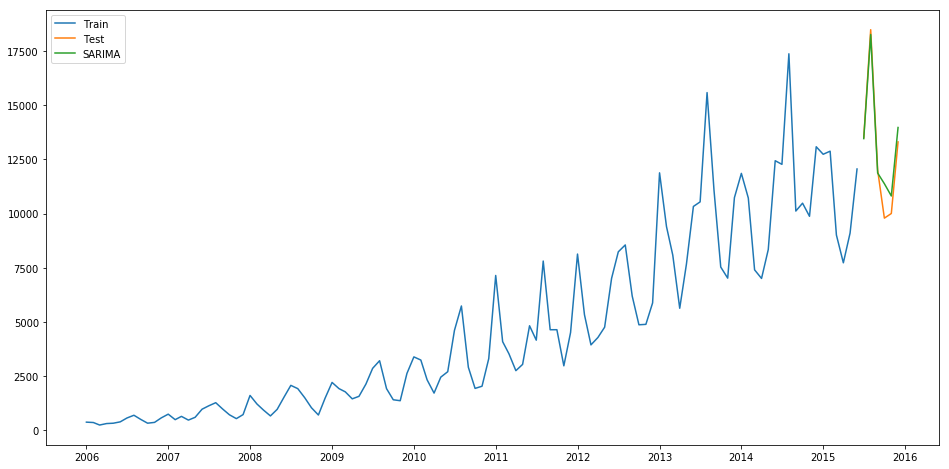

In [102]:
plt.figure(figsize=(16,8))
plt.plot( train['Bookings'], label='Train')
plt.plot(test['Bookings'], label='Test')
plt.plot(book_ts_forecasted, label='SARIMA')
plt.legend(loc='best')
plt.show()